# K-means y hierarchical clustering

## Tema: Aprendizaje no supervisado 
## Presentado a: Doc. Breyner Parra 
## Materia: Analisis de Datos 
## Estudiante: Juan Carlos Pulido Sierra

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
dataset.shape

(200, 5)

In [5]:
data=dataset.drop(['Gender'], axis=1)

In [6]:
data.head(20)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
5,6,22,17,76
6,7,35,18,6
7,8,23,18,94
8,9,64,19,3
9,10,30,19,72


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


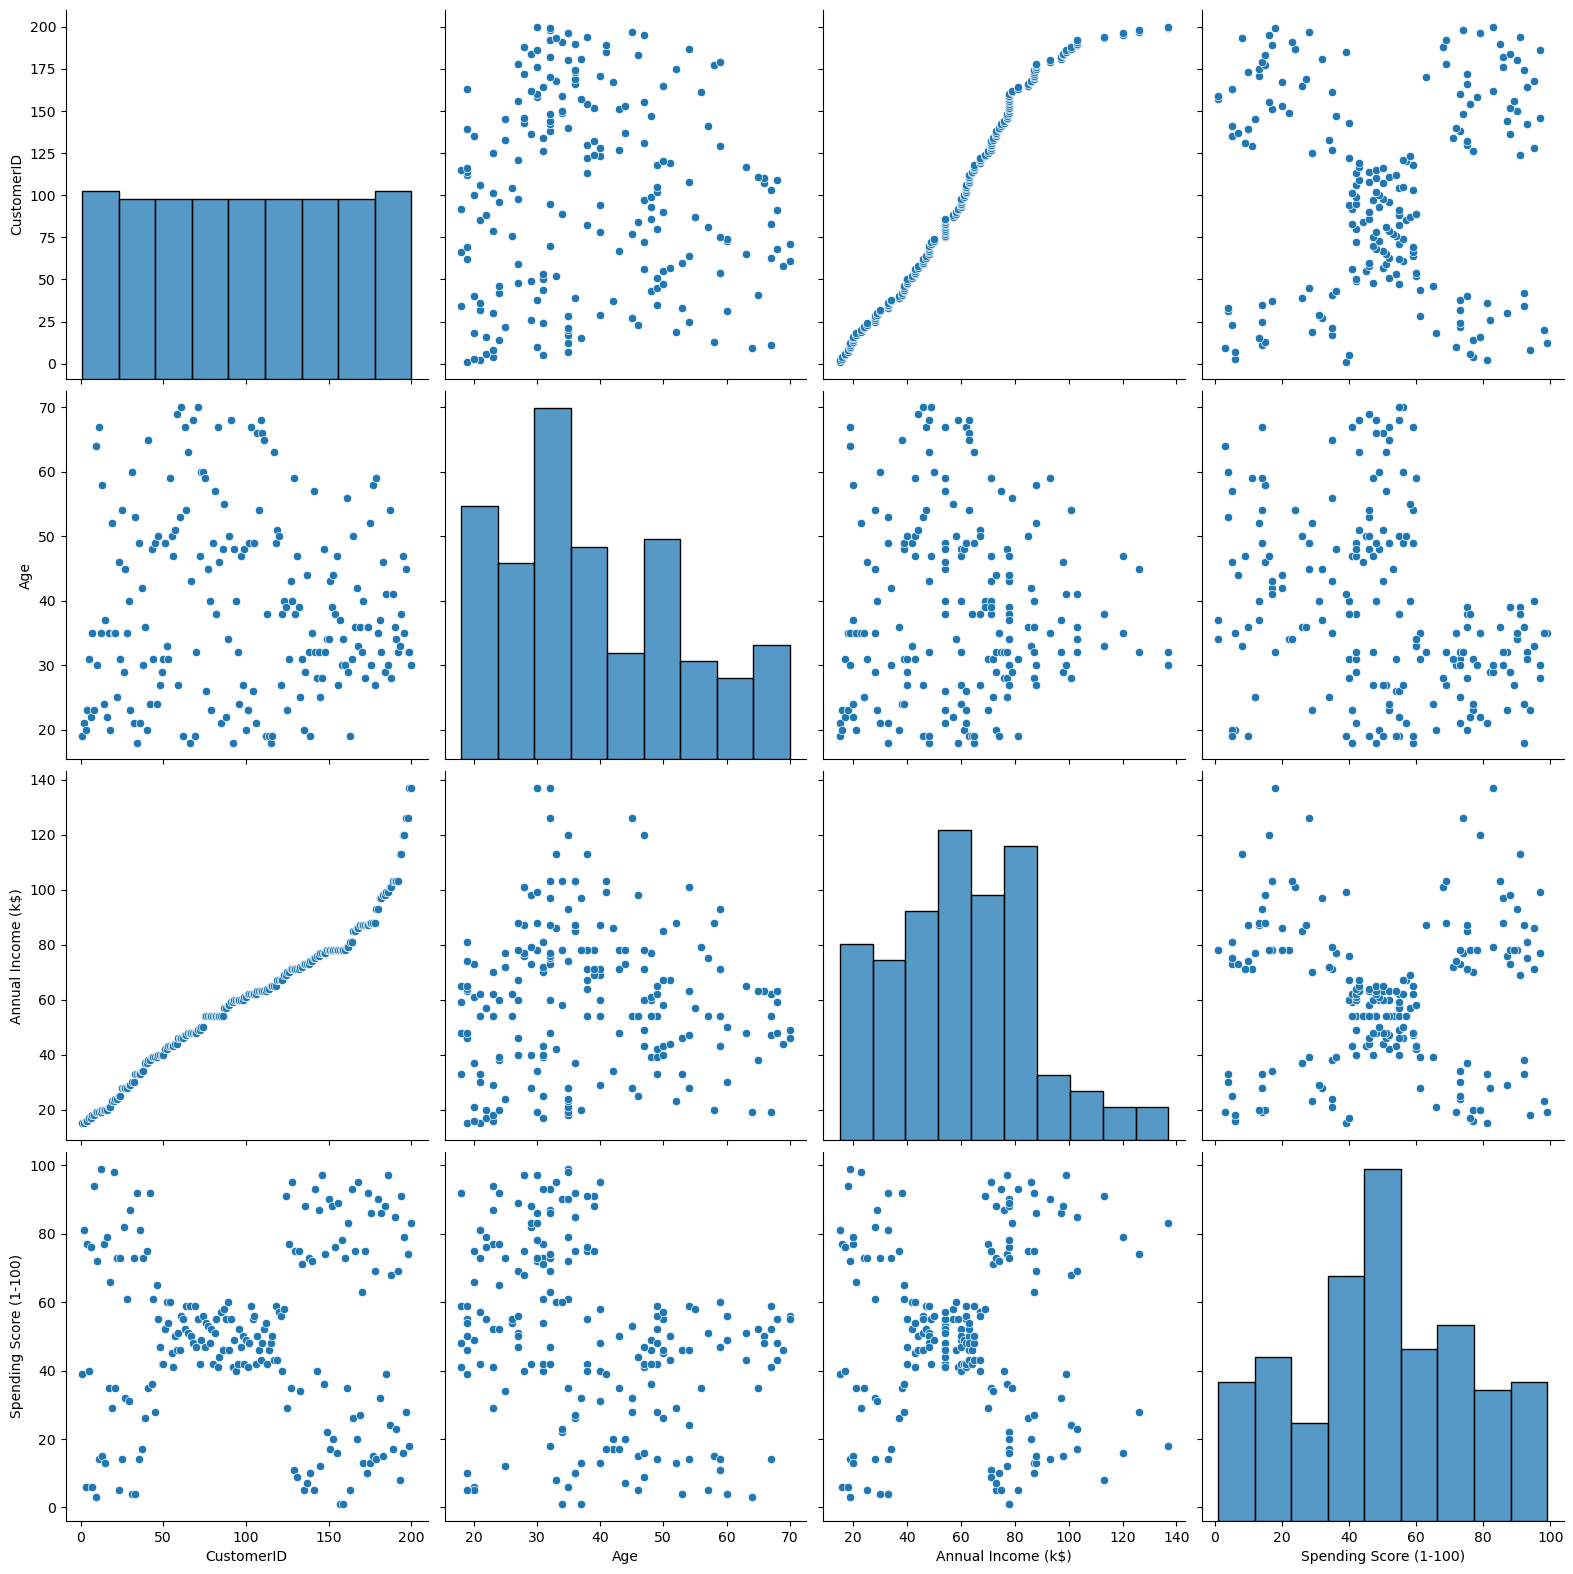

In [10]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [11]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

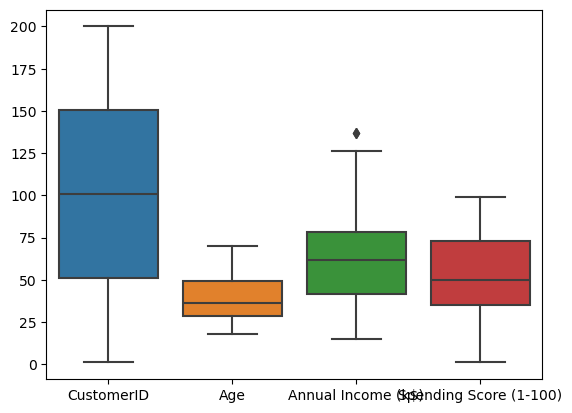

In [12]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [13]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


# ************* K-MEANS ***************

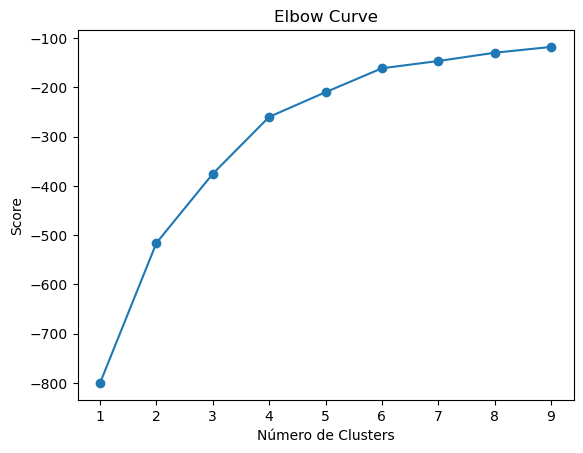

In [14]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.96109881, -0.3121851 ,  0.89912973,  0.06446185],
       [-1.0239213 , -0.86423656, -0.98001477,  0.34984199],
       [-0.47436436,  1.15787451, -0.42523207, -0.38283068]])

In [25]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

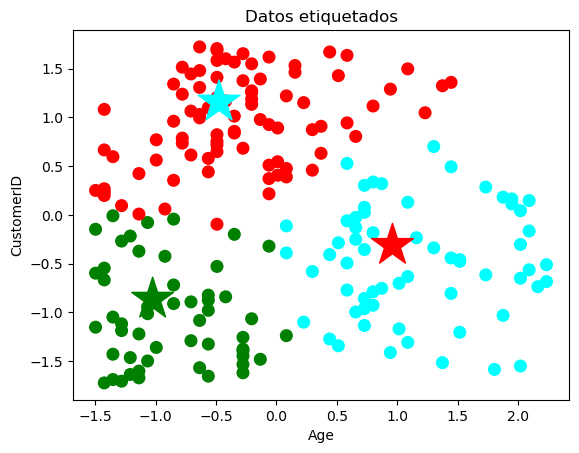

In [33]:
f1 = X['Age'].values
f2 = X['CustomerID'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.show()

In [34]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[0]
['red']


# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

# Analisis de resultados 

### Puntaje de silueta: El puntaje de silueta obtenido de 0.3362 sugiere que los clusters están relativamente bien definidos y separados. Un puntaje positivo indica que los puntos están más cerca de los centroides de sus propios clusters que de los centroides de otros clusters, lo que indica una buena separación entre los clusters. 
    
### Índice de Calinski-Harabasz: Con un valor de 111.4862, el índice de Calinski-Harabasz sugiere que la dispersión entre los clusters es relativamente alta en comparación con la dispersión dentro de los clusters. Esto implica que los clusters están bien definidos y que la estructura de los datos es relativamente clara.

### Inertia: La suma de cuadrados dentro de los clusters (inercia) es de 375.2627. Este valor indica cuánto están los puntos agrupados alrededor de los centroides de sus respectivos clusters. Una inercia más baja sugiere que los puntos están más cerca de sus centroides, lo que indica clusters más densos.

### Davies-Bouldin Index: Con un valor de 1.0219, el índice Davies-Bouldin sugiere que los clusters están relativamente bien separados y compactos. Un valor más bajo indica clusters mejor definidos y más compactos.

### En general, los resultados del algoritmo K-Means ha producido clusters razonablemente buenos para tus datos. Los puntajes de silueta y el índice de Calinski-Harabasz indican una buena separación y estructura de los clusters, mientras que la inercia y el índice Davies-Bouldin sugieren que los clusters son densos y bien definidos.

# Hierarchical Clustering


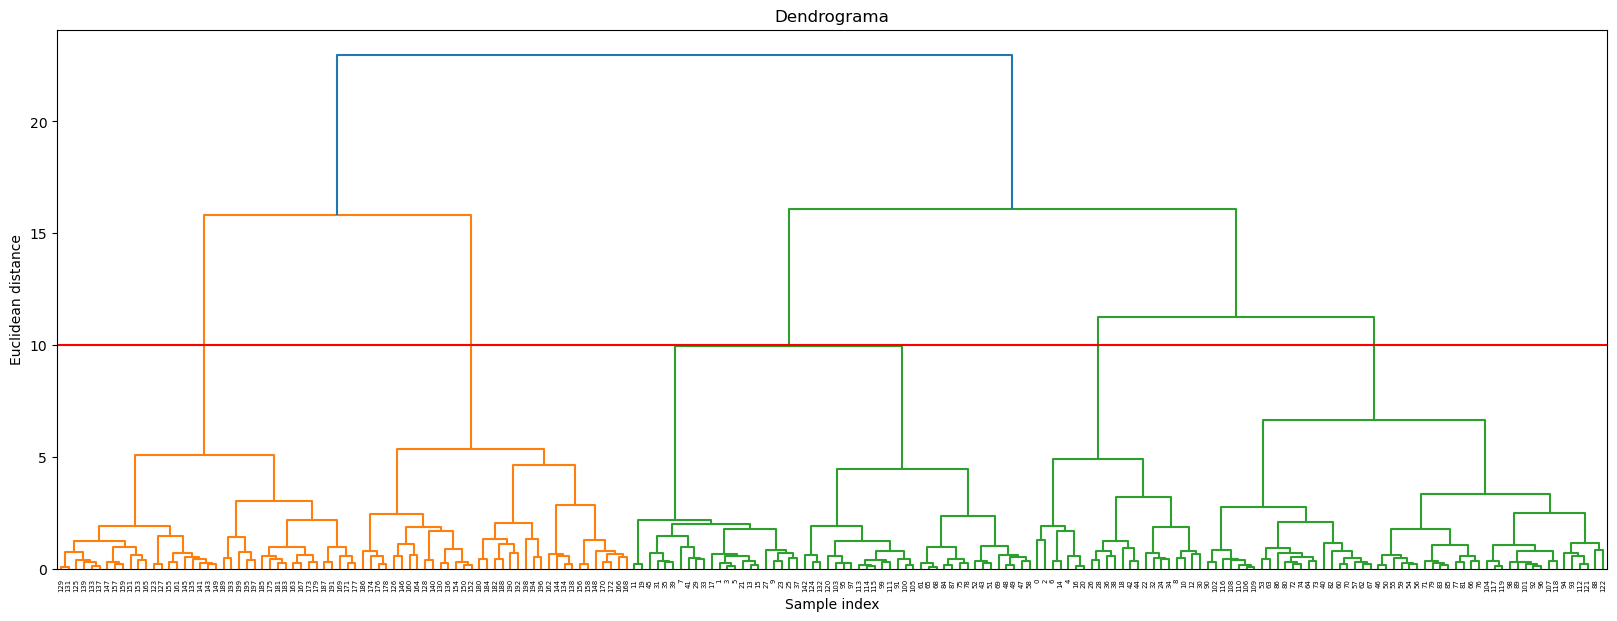

In [38]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [39]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [40]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

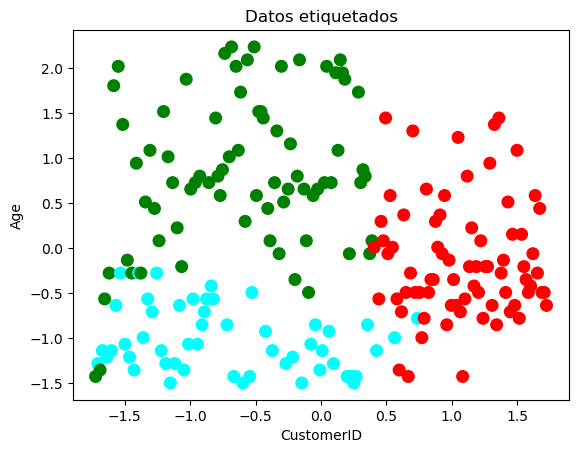

In [41]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

In [42]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

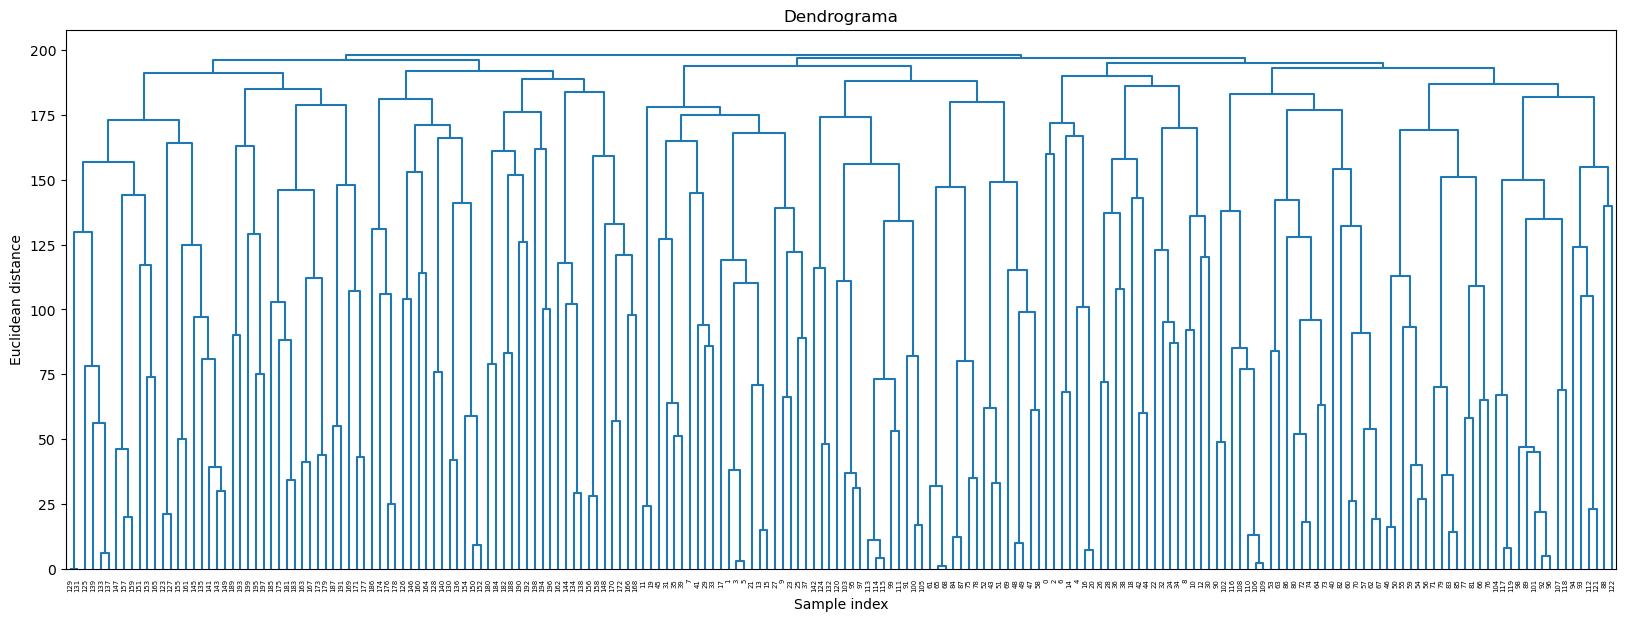

In [43]:
plot_dendrogram(hier_clustering, color_threshold=0)

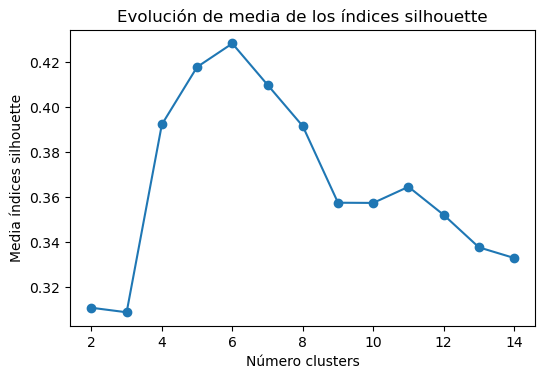

In [44]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [45]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [46]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


# Analisis de resultados 

### Visualización del dendrograma: El dendrograma muestra cómo se agrupan las observaciones a medida que se fusionan en clusters más grandes. Esto proporciona una vista estructurada de cómo se forman los clusters a diferentes niveles de similitud.

### Asignación de etiquetas de cluster: Las etiquetas de cluster utilizando el algoritmo de clustering jerárquico aglomerativo. Estas etiquetas representan la pertenencia de cada observación a un cluster específico basado en la estructura jerárquica del dendrograma.

### Visualización de los datos etiquetados: Los datos etiquetados por cluster en un gráfico de dispersión, permite ver cómo se distribuyen las observaciones en el espacio de características y cómo se agrupan en diferentes clusters.

### Medidas de calidad: Hay varias medidas de calidad para evaluar la efectividad del clustering jerárquico aglomerativo, incluyendo el puntaje de silueta, el índice de Calinski-Harabasz y el índice Davies-Bouldin. Estas métricas proporcionan información sobre la cohesión, separación y compacidad de los clusters obtenidos.

### Coeficiente de correlación cofenética: El coeficiente de correlación cofenética para evaluar qué tan bien el dendrograma preserva las relaciones de distancia entre las observaciones originales. Un coeficiente más alto indica una mejor preservación de las distancias originales en el dendrograma.


### Puntaje de silueta: Con un puntaje de silueta de 0.3087, aunque no es excepcionalmente alto, indica que los clusters tienen cierta cohesión y separación. Un valor más cercano a 1 sería deseable para una separación más clara entre los clusters.
###   Índice de Calinski-Harabasz: El valor obtenido de 94.8543 sugiere una buena estructura de clusterización. Un valor más alto indica una mayor dispersión entre los clusters en comparación con la dispersión dentro de los clusters, lo que sugiere clusters bien definido.

### El clustering jerárquico aglomerativo ha sido analizado en detalle utilizando diversas técnicas y métricas para evaluar su efectividad en la agrupación de tus datos. Estas evaluaciones proporcionan información sobre la calidad y la estructura de los clusters obtenidos, así como la fidelidad del dendrograma en preservar las relaciones de distancia originales